#### Importing Libraries

In [38]:
#Python environment for data analysis, visualization, and plotting. 
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import scipy as sp
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Importing Files and Dataset

In [7]:
#importing all files within the specified directory
import os 
for dirname , _,filenames in os.walk('D:\MS Sem1\Machine Learning\datasets'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

D:\MS Sem1\Machine Learning\datasets\Career Mode female player datasets - FIFA 16-22.xlsx
D:\MS Sem1\Machine Learning\datasets\Career Mode player datasets - FIFA 15-22.xlsx
D:\MS Sem1\Machine Learning\datasets\female_players_16.csv
D:\MS Sem1\Machine Learning\datasets\female_players_17.csv
D:\MS Sem1\Machine Learning\datasets\female_players_18.csv
D:\MS Sem1\Machine Learning\datasets\female_players_19.csv
D:\MS Sem1\Machine Learning\datasets\female_players_20.csv
D:\MS Sem1\Machine Learning\datasets\female_players_21.csv
D:\MS Sem1\Machine Learning\datasets\female_players_22.csv
D:\MS Sem1\Machine Learning\datasets\players_15.csv
D:\MS Sem1\Machine Learning\datasets\players_16.csv
D:\MS Sem1\Machine Learning\datasets\players_17.csv
D:\MS Sem1\Machine Learning\datasets\players_18.csv
D:\MS Sem1\Machine Learning\datasets\players_19.csv
D:\MS Sem1\Machine Learning\datasets\players_20.csv
D:\MS Sem1\Machine Learning\datasets\players_21.csv
D:\MS Sem1\Machine Learning\datasets\players_22.cs

In [8]:
#importing the dataset
df=pd.read_csv('D:\MS Sem1\Machine Learning\datasets\players_22.csv', low_memory=False)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

#### Data Cleaning and Description

In [9]:
#obtain information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [10]:
#remove the specified columns from the dataset
df=df.drop(['sofifa_id','player_url','long_name','league_level','body_type','real_face','release_clause_eur',
            'player_tags','club_jersey_number','club_loaned_from','club_contract_valid_until','club_joined','nation_position',
            'nation_jersey_number','player_traits','dob','nation_team_id','nationality_id',
            'club_team_id'],axis=1)

In [11]:
#showing the top 10 columns and rows for the dataset after removing the columns 
df.head(10)

short_name player_positions  overall  potential    value_eur  \
0           L. Messi       RW, ST, CF       93         93   78000000.0   
1     R. Lewandowski               ST       92         92  119500000.0   
2  Cristiano Ronaldo           ST, LW       91         91   45000000.0   
3          Neymar Jr          LW, CAM       91         91  129000000.0   
4       K. De Bruyne          CM, CAM       91         91  125500000.0   
5           J. Oblak               GK       91         93  112000000.0   
6          K. Mbappé           ST, LW       91         95  194000000.0   
7           M. Neuer               GK       90         90   13500000.0   
8      M. ter Stegen               GK       90         92   99000000.0   
9            H. Kane               ST       90         90  129500000.0   

   wage_eur  age  height_cm  weight_kg            club_name  ...   lcb    cb  \
0  320000.0   34        170         72  Paris Saint-Germain  ...  50+3  50+3   
1  270000.0   32        185         81    FC Bayern München  ...  60+3  60+3   
2  270000.0   36        187         83    Manchester United  ...  53+3  53+3   
3  270000.0   29        175         68  Paris Saint-Germain  ...  50+3  50+3   
4  350000.0   30        181         70      Manchester City  ...  69+3  69+3   
5  130000.0   28        188         87   Atlético de Madrid  ...  33+3  33+3   
6  230000.0   22        182         73  Paris Saint-Germain  ...  54+3  54+3   
7   86000.0   35        193         93    FC Bayern München  ...  34+3  34+3   
8  250000.0   29        187         85         FC Barcelona  ...  33+3  33+3   
9  240000.0   27        188         89    Tottenham Hotspur  ...  61+3  61+3   

    rcb    rb    gk                                    player_face_url  \
0  50+3  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  60+3  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  53+3  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  50+3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  69+3  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   
5  33+3  32+3  89+3  https://cdn.sofifa.net/players/200/389/22_120.png   
6  54+3  63+3  18+3  https://cdn.sofifa.net/players/231/747/22_120.png   
7  34+3  35+3  88+2  https://cdn.sofifa.net/players/167/495/22_120.png   
8  33+3  31+3  88+3  https://cdn.sofifa.net/players/192/448/22_120.png   
9  61+3  64+3  20+3  https://cdn.sofifa.net/players/202/126/22_120.png   

                             club_logo_url  \
0   https://cdn.sofifa.net/teams/73/60.png   
1   https://cdn.sofifa.net/teams/21/60.png   
2   https://cdn.sofifa.net/teams/11/60.png   
3   https://cdn.sofifa.net/teams/73/60.png   
4   https://cdn.sofifa.net/teams/10/60.png   
5  https://cdn.sofifa.net/teams/240/60.png   
6   https://cdn.sofifa.net/teams/73/60.png   
7   https://cdn.sofifa.net/teams/21/60.png   
8  https://cdn.sofifa.net/teams/241/60.png   
9   https://cdn.sofifa.net/teams/18/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   
5      https://cdn.sofifa.net/flags/es.png   
6      https://cdn.sofifa.net/flags/fr.png   
7      https://cdn.sofifa.net/flags/de.png   
8      https://cdn.sofifa.net/flags/es.png   
9  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   
5                                       NaN   
6  https://cdn.sofifa.net/teams/1335/60.png   
7  https://cdn.sofifa.net/teams/1337/60.png   
8                                       NaN   
9  https://cdn.

In [12]:
# obtain summary statistics for each numerical column in the DataFrame
df.describe().T


count          mean           std     min  \
overall                      19239.0  6.577218e+01  6.880232e+00    47.0   
potential                    19239.0  7.107937e+01  6.086213e+00    49.0   
value_eur                    19165.0  2.850452e+06  7.613700e+06  9000.0   
wage_eur                     19178.0  9.017989e+03  1.947018e+04   500.0   
age                          19239.0  2.521082e+01  4.748235e+00    16.0   
height_cm                    19239.0  1.812997e+02  6.863179e+00   155.0   
weight_kg                    19239.0  7.494303e+01  7.069434e+00    49.0   
weak_foot                    19239.0  2.946151e+00  6.715605e-01     1.0   
skill_moves                  19239.0  2.352461e+00  7.676590e-01     1.0   
international_reputation     19239.0  1.094184e+00  3.710982e-01     1.0   
pace                         17107.0  6.821307e+01  1.093315e+01    28.0   
shooting                     17107.0  5.234530e+01  1.405162e+01    18.0   
passing                      17107.0  5.731256e+01  1.006897e+01    25.0   
dribbling                    17107.0  6.256117e+01  9.651312e+00    27.0   
defending                    17107.0  5.170363e+01  1.618975e+01    14.0   
physic                       17107.0  6.482329e+01  9.791886e+00    29.0   
attacking_crossing           19239.0  4.957742e+01  1.803466e+01     6.0   
attacking_finishing          19239.0  4.589443e+01  1.972102e+01     2.0   
attacking_heading_accuracy   19239.0  5.178388e+01  1.729418e+01     5.0   
attacking_short_passing      19239.0  5.886798e+01  1.449086e+01     7.0   
attacking_volleys            19239.0  4.246385e+01  1.765333e+01     3.0   
skill_dribbling              19239.0  5.566043e+01  1.878459e+01     4.0   
skill_curve                  19239.0  4.726893e+01  1.818109e+01     6.0   
skill_fk_accuracy            19239.0  4.224903e+01  1.717859e+01     4.0   
skill_long_passing           19239.0  5.307225e+01  1.502657e+01     9.0   
skill_ball_control           19239.0  5.847201e+01  1.666372e+01     8.0   
movement_acceleration        19239.0  6.465289e+01  1.516740e+01    14.0   
movement_sprint_speed        19239.0  6.471490e+01  1.496543e+01    15.0   
movement_agility             19239.0  6.350008e+01  1.486228e+01    18.0   
movement_reactions           19239.0  6.145002e+01  9.042281e+00    25.0   
movement_balance             19239.0  6.406861e+01  1.432479e+01    15.0   
power_shot_power             19239.0  5.777686e+01  1.319222e+01    20.0   
power_jumping                19239.0  6.481350e+01  1.212298e+01    22.0   
power_stamina                19239.0  6.308488e+01  1.614528e+01    12.0   
power_strength               19239.0  6.500774e+01  1.266352e+01    19.0   
power_long_shots             19239.0  4.664270e+01  1.941158e+01     4.0   
mentality_aggression         19239.0  5.553896e+01  1.697218e+01    10.0   
mentality_interceptions      19239.0  4.661355e+01  2.067708e+01     3.0   
mentality_positioning        19239.0  5.033021e+01  1.962160e+01     2.0   
mentality_vision             19239.0  5.396460e+01  1.365048e+01    10.0   
mentality_penalties          19239.0  4.785872e+01  1.576858e+01     7.0   
mentality_composure          19239.0  5.792983e+01  1.215933e+01    12.0   
defending_marking_awareness  19239.0  4.660175e+01  2.020081e+01     4.0   
defending_standing_tackle    19239.0  4.804558e+01  2.123272e+01     5.0   
defending_sliding_tackle     19239.0  4.590670e+01  2.075568e+01     5.0   
goalkeeping_diving           19239.0  1.640610e+01  1.757403e+01     2.0   
goalkeeping_handling         19239.0  1.619247e+01  1.683953e+01     2.0   
goalkeeping_kicking          19239.0  1.605536e+01  1.656455e+01     2.0   
goalkeeping_positioning      19239.0  1.622927e+01  1.705978e+01     2.0   
goalkeeping_reflexes         19239.0  1.649181e+01  1.788483e+01     2.0   
goalkeeping_speed             2132.0  3.643996e+01  1.075156e+01    15.0   

                                  25%       50%        75%          max  
over

In [13]:
#retrieve the dimensions (number of rows and columns)
df.shape

(19239, 91)

In [14]:
#retrieve the column names of the DataFrame 
df.columns 

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'club_position', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_comp

In [15]:
#Calculate number of categorical and numerical columns
print('Number of Categorical Columns: ', len(df.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(df.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  40
Number of Numerical Columns:  51


In [16]:
#count the number of unique values in each column
df.nunique()

short_name          18145
player_positions      674
overall                47
potential              46
value_eur             252
                    ...  
player_face_url     19239
club_logo_url         701
club_flag_url          49
nation_logo_url        33
nation_flag_url       163
Length: 91, dtype: int64

In [17]:
# used to check if any missing values (NaNs) exist in each column 
df.isnull().any()

short_name          False
player_positions    False
overall             False
potential           False
value_eur            True
                    ...  
player_face_url     False
club_logo_url        True
club_flag_url        True
nation_logo_url      True
nation_flag_url     False
Length: 91, dtype: bool

In [18]:
#list of unique column names in the DataFrame
list(df.columns.unique())

['short_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_name',
 'league_name',
 'club_position',
 'nationality_name',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_sta

In [19]:
#checks if the indices of missing values in two specific columns 
missing_1 = df[df['goalkeeping_handling'].isnull()].index.tolist()
missing_2 = df[df['goalkeeping_reflexes'].isnull()].index.tolist()
if missing_1 == missing_2:
    print('They are same')
else:
    print('They are different')

They are same


In [20]:
#drops the rows from the DataFrame in the goalkeeping_handling column
df.drop(df.index[missing_1],inplace=True)

In [21]:
# calculates the number of missing values in each column
df.isnull().sum()

short_name              0
player_positions        0
overall                 0
potential               0
value_eur              74
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 91, dtype: int64

In [22]:
#maximum value for each aspect represented by the columns
column=['attacking_crossing','attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
       'skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','movement_acceleration',
        'movement_sprint_speed','movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
        'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
        'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure',
        'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking',
        'goalkeeping_positioning','goalkeeping_reflexes','goalkeeping_speed',]
print('Best Player in different aspects:')

i=0
while i < len(column):
    print('Best {0} : {1}'.format(column[i],df.loc[df[column[i]].idxmax()]['short_name']))
    i += 1


Best Player in different aspects:
Best attacking_crossing : K. De Bruyne
Best attacking_finishing : L. Messi
Best attacking_heading_accuracy : L. de Jong
Best attacking_short_passing : K. De Bruyne
Best attacking_volleys : L. Suárez
Best skill_dribbling : L. Messi
Best skill_curve : Quaresma
Best skill_fk_accuracy : L. Messi
Best skill_long_passing : K. De Bruyne
Best skill_ball_control : L. Messi
Best movement_acceleration : K. Mbappé
Best movement_sprint_speed : K. Mbappé
Best movement_agility : Neymar Jr
Best movement_reactions : L. Messi
Best movement_balance : R. Fraser
Best power_shot_power : A. Kolarov
Best power_jumping : Cristiano Ronaldo
Best power_stamina : N. Kanté
Best power_strength : A. Akinfenwa
Best power_long_shots : L. Messi
Best mentality_aggression : B. Pearson
Best mentality_interceptions : N. Kanté
Best mentality_positioning : T. Müller
Best mentality_vision : L. Messi
Best mentality_penalties : Neymar Jr
Best mentality_composure : L. Messi
Best defending_standin

In [23]:
#creates new columns in the DataFrame 
df['Value in Pounds'] = df['value_eur']
df['Wage in Pounds'] = df['wage_eur']
df['Height in Cms'] = df['height_cm']
df['Weight in kg'] = df['weight_kg']

In [24]:
#display specific columns from the DataFrame
df[['short_name','Height in Cms', 'Weight in kg','Value in Pounds','Wage in Pounds']].head()

short_name  Height in Cms  Weight in kg  Value in Pounds  \
0           L. Messi            170            72       78000000.0   
1     R. Lewandowski            185            81      119500000.0   
2  Cristiano Ronaldo            187            83       45000000.0   
3          Neymar Jr            175            68      129000000.0   
4       K. De Bruyne            181            70      125500000.0   

   Wage in Pounds  
0        320000.0  
1        270000.0  
2        270000.0  
3        270000.0  
4        350000.0

In [25]:
#Total countries and players in country
print('Total number of countries : {0}'.format(df['nationality_name'].nunique()))
print(df['nationality_name'].value_counts().head(5))

Total number of countries : 163
nationality_name
England      1719
Germany      1214
Spain        1086
France        980
Argentina     960
Name: count, dtype: int64


In [26]:
#top overall players
df.groupby(['short_name'])['overall'].max().sort_values(ascending = False).head()

short_name
L. Messi             93
R. Lewandowski       92
Cristiano Ronaldo    91
K. De Bruyne         91
K. Mbappé            91
Name: overall, dtype: int64

In [27]:
#top potential players
df.groupby(['short_name'])['potential'].max().sort_values(ascending = False).head()

short_name
K. Mbappé        95
L. Messi         93
E. Haaland       93
G. Donnarumma    93
J. Oblak         93
Name: potential, dtype: int64

In [28]:
#top value players
df.groupby(['short_name'])['value_eur'].max().sort_values(ascending = False).head()

short_name
K. Mbappé       194000000.0
E. Haaland      137500000.0
H. Kane         129500000.0
Neymar Jr       129000000.0
K. De Bruyne    125500000.0
Name: value_eur, dtype: float64

#### Data Analysis

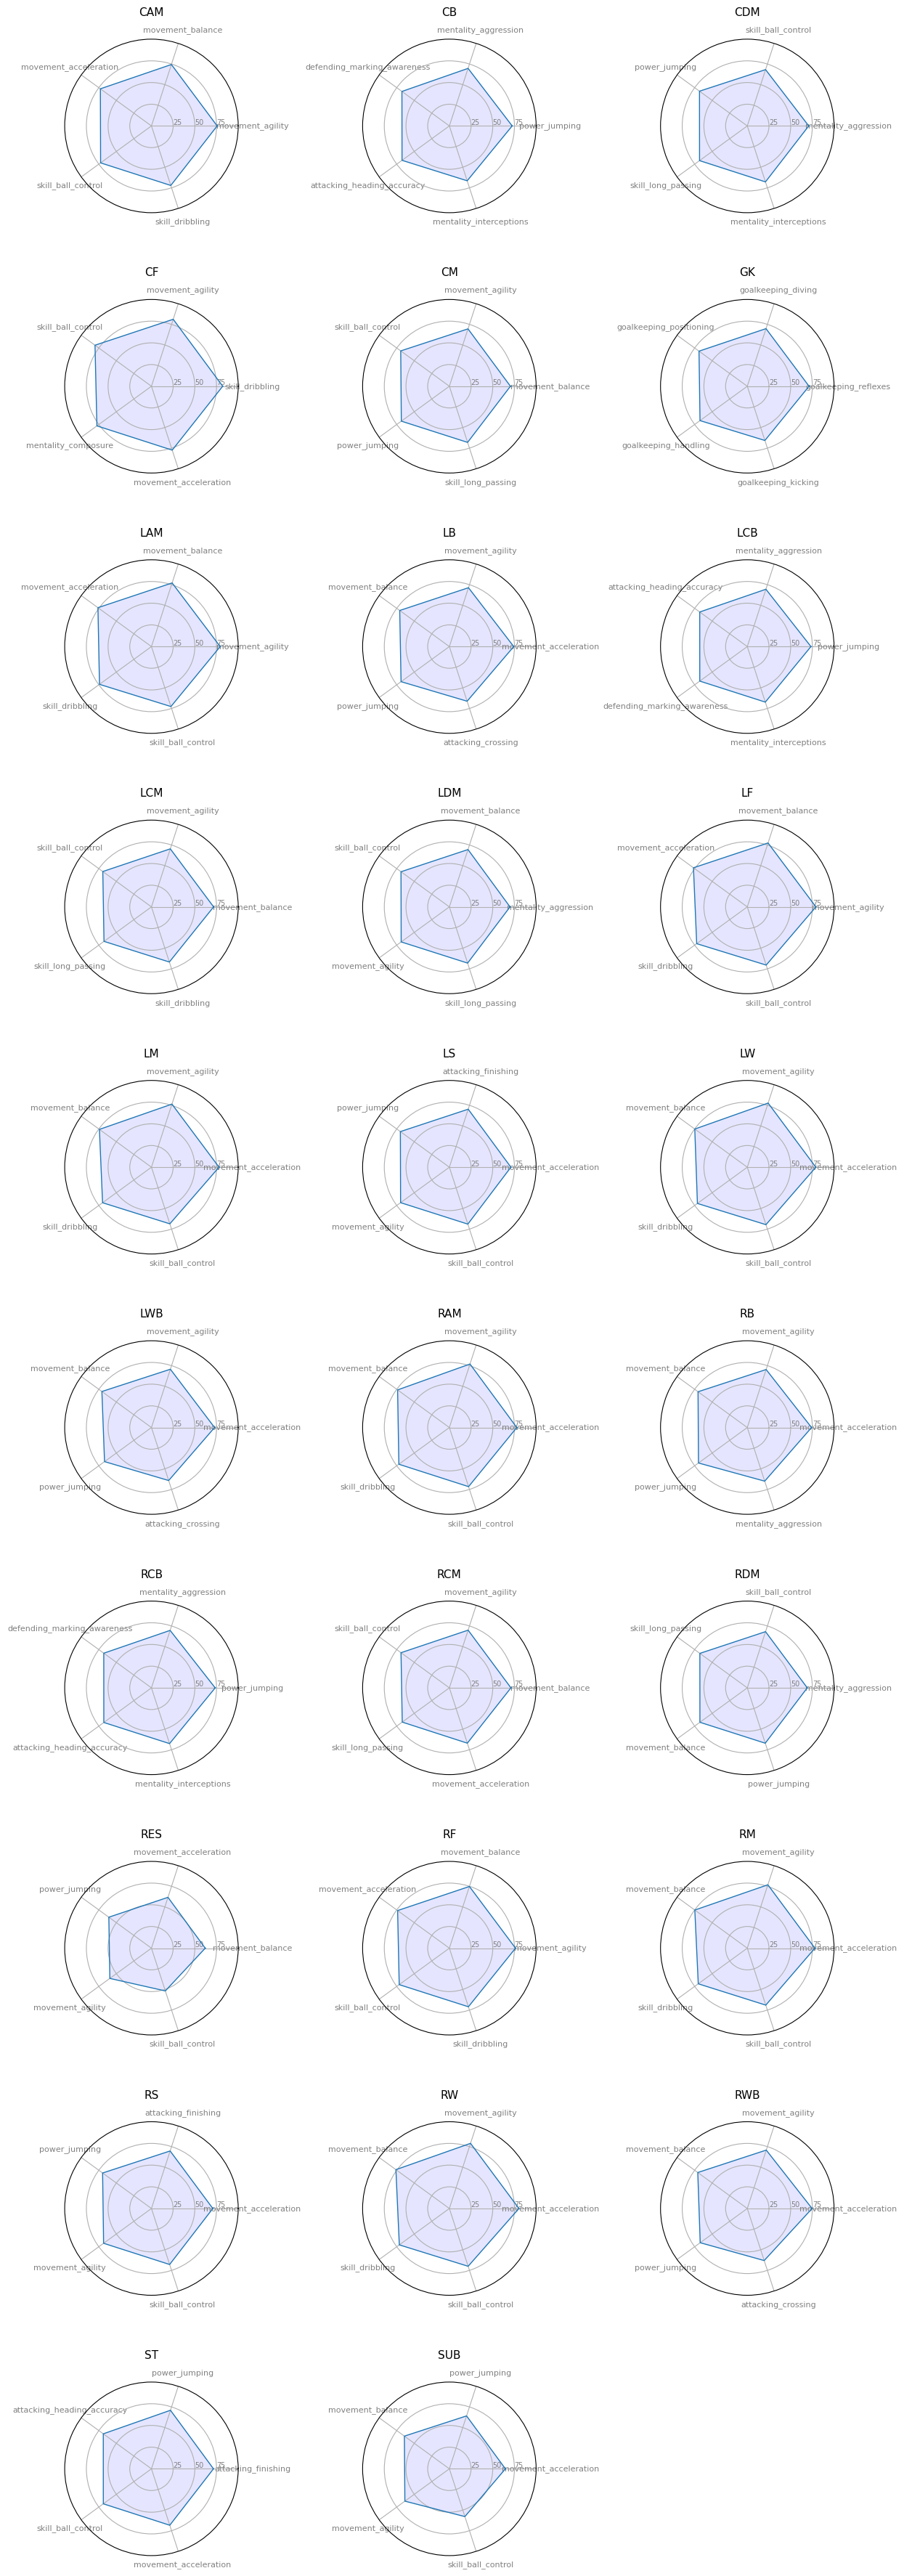

In [29]:
#radar charts to visualize the top five features for each player position
player_features = (
    'movement_acceleration', 'movement_agility', 'mentality_aggression', 
    'movement_balance', 'skill_ball_control', 'mentality_composure', 
    'attacking_crossing', 'skill_dribbling', 'skill_fk_accuracy', 
    'attacking_finishing', 'goalkeeping_diving', 'goalkeeping_handling', 
    'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 
    'attacking_heading_accuracy', 'mentality_interceptions', 'power_jumping', 
    'skill_long_passing', 'power_long_shots', 'defending_marking_awareness', 'mentality_penalties'
)

from math import pi

player_features = list(player_features)

idx = 1
plt.figure(figsize=(15, 45))
for position_name, features in df.groupby(df['club_position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))

    
    # number of variable
    categories=top_features.keys()
    N = len(categories)
    
    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
 # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size=11, y=1.1)
    
    idx += 1

In [30]:
# Displaying most valued Plauer and highest earner
most_valued_player = df.loc[df['value_eur'].idxmax()]
print('Most valued player:')
print(most_valued_player['short_name'])  # Assuming the player's name is stored in the 'short_name' column

# Highest earner
highest_earner = df.loc[df['wage_eur'].idxmax()]
print('\nHighest earner:')
print(highest_earner['short_name'])  # Assuming the player's name is stored in the 'short_name' column

print("--" * 40)
print("\nTop Earners:")
# Sorting the DataFrame by 'wage_eur' in descending order to get the top earners
top_earners = df.sort_values(by='wage_eur', ascending=False).head(10)
print(top_earners[['short_name', 'wage_eur']])

Most valued player:
K. Mbappé

Highest earner:
K. De Bruyne
--------------------------------------------------------------------------------

Top Earners:
           short_name  wage_eur
4        K. De Bruyne  350000.0
11         K. Benzema  350000.0
0            L. Messi  320000.0
14           Casemiro  310000.0
24           T. Kroos  310000.0
27        R. Sterling  290000.0
2   Cristiano Ronaldo  270000.0
3           Neymar Jr  270000.0
1      R. Lewandowski  270000.0
17           M. Salah  270000.0


In [31]:
#defining columns required and creating a new dataframe
columns_required = ['short_name', 'overall', 'potential', 'age', 'weak_foot', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
df_new= df[columns_required].fillna(0)

In [32]:
#top 50 columns of new dataframe
df_new.head(50)

short_name  overall  potential  age  weak_foot  skill_moves  \
0              L. Messi       93         93   34          4            4   
1        R. Lewandowski       92         92   32          4            4   
2     Cristiano Ronaldo       91         91   36          4            5   
3             Neymar Jr       91         91   29          5            5   
4          K. De Bruyne       91         91   30          5            4   
5              J. Oblak       91         93   28          3            1   
6             K. Mbappé       91         95   22          4            5   
7              M. Neuer       90         90   35          4            1   
8         M. ter Stegen       90         92   29          4            1   
9               H. Kane       90         90   27          5            3   
10             N. Kanté       90         90   30          3            2   
11           K. Benzema       89         89   33          4            4   
12          T. Courtois       89         91   29          3            1   
13               H. Son       89         89   28          5            4   
14             Casemiro       89         89   29          3            2   
15          V. van Dijk       89         89   29          3            2   
16              S. Mané       89         89   29          4            4   
17             M. Salah       89         89   29          3            4   
18              Ederson       89         91   27          3            1   
19           J. Kimmich       89         90   26          4            3   
20              Alisson       89         90   28          3            1   
21        G. Donnarumma       89         93   22          3            1   
22         Sergio Ramos       88         88   35          3            3   
23            L. Suárez       88         88   34          4            3   
24             T. Kroos       88         88   31          5            3   
25            R. Lukaku       88         88   28          4            3   
26             K. Navas       88         88   34          3            1   
27          R. Sterling       88         89   26          3            4   
28      Bruno Fernandes       88         89   26          3            4   
29           E. Haaland       88         93   20          3            3   
30            S. Agüero       87         87   33          4            4   
31            H. Lloris       87         87   34          1            1   
32            L. Modrić       87         87   35          4            4   
33          Á. Di María       87         87   33          2            5   
34          W. Szczęsny       87         87   31          3            1   
35            T. Müller       87         87   31          4            3   
36          C. Immobile       87         87   31          4            3   
37             P. Pogba       87         87   28          4            5   
38          M. Verratti       87         87   28          4            4   
39           Marquinhos       87         90   27          3            3   
40          L. Goretzka       87         88   26          4            3   
41            P. Dybala       87         88   27          3            4   
42         A. Robertson       87         88   27          2            3   
43           F. de Jong       87         92   24          3            4   
44  T. Alexander-Arnold       87         92   22          4            3   
45            J. Sancho       87         91   21          3            5   
46           Rúben Dias       87         91   24          4            2   
47         G. Chiellini       86         86   36          3            2   
48        S. Handanovič       86         86   36          3            1   
49           M. Hummels       86         86   32          3            3   

    pace  shooting  passing  dribbling  defending  physic  
0   85.0      92.0     91.0       95.0       34.0    65.0  
1   78.0      92

In [33]:
#calculates the number of missing values in each column
df_new.isnull().sum()

short_name     0
overall        0
potential      0
age            0
weak_foot      0
skill_moves    0
pace           0
shooting       0
passing        0
dribbling      0
defending      0
physic         0
dtype: int64

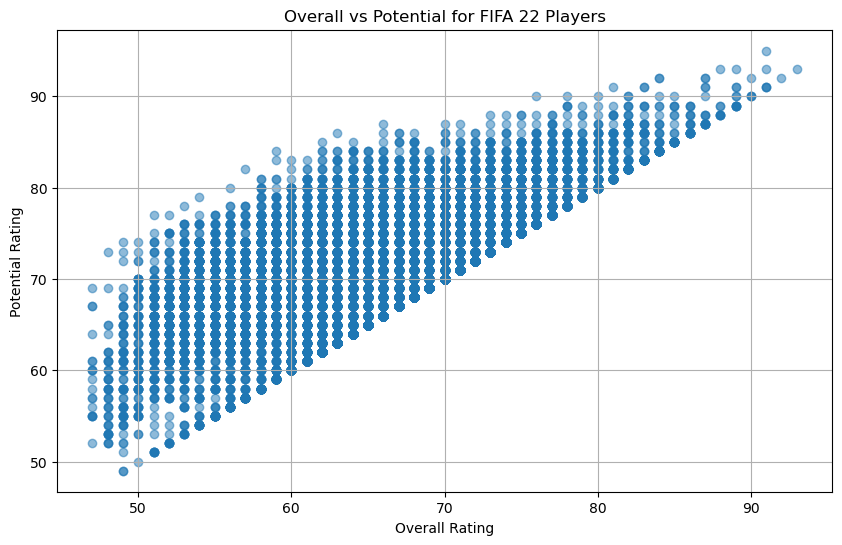

In [34]:
short_name = df_new['short_name']
overall = df_new['overall']
potential = df_new['potential']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(overall, potential, alpha=0.5)
plt.title('Overall vs Potential for FIFA 22 Players')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

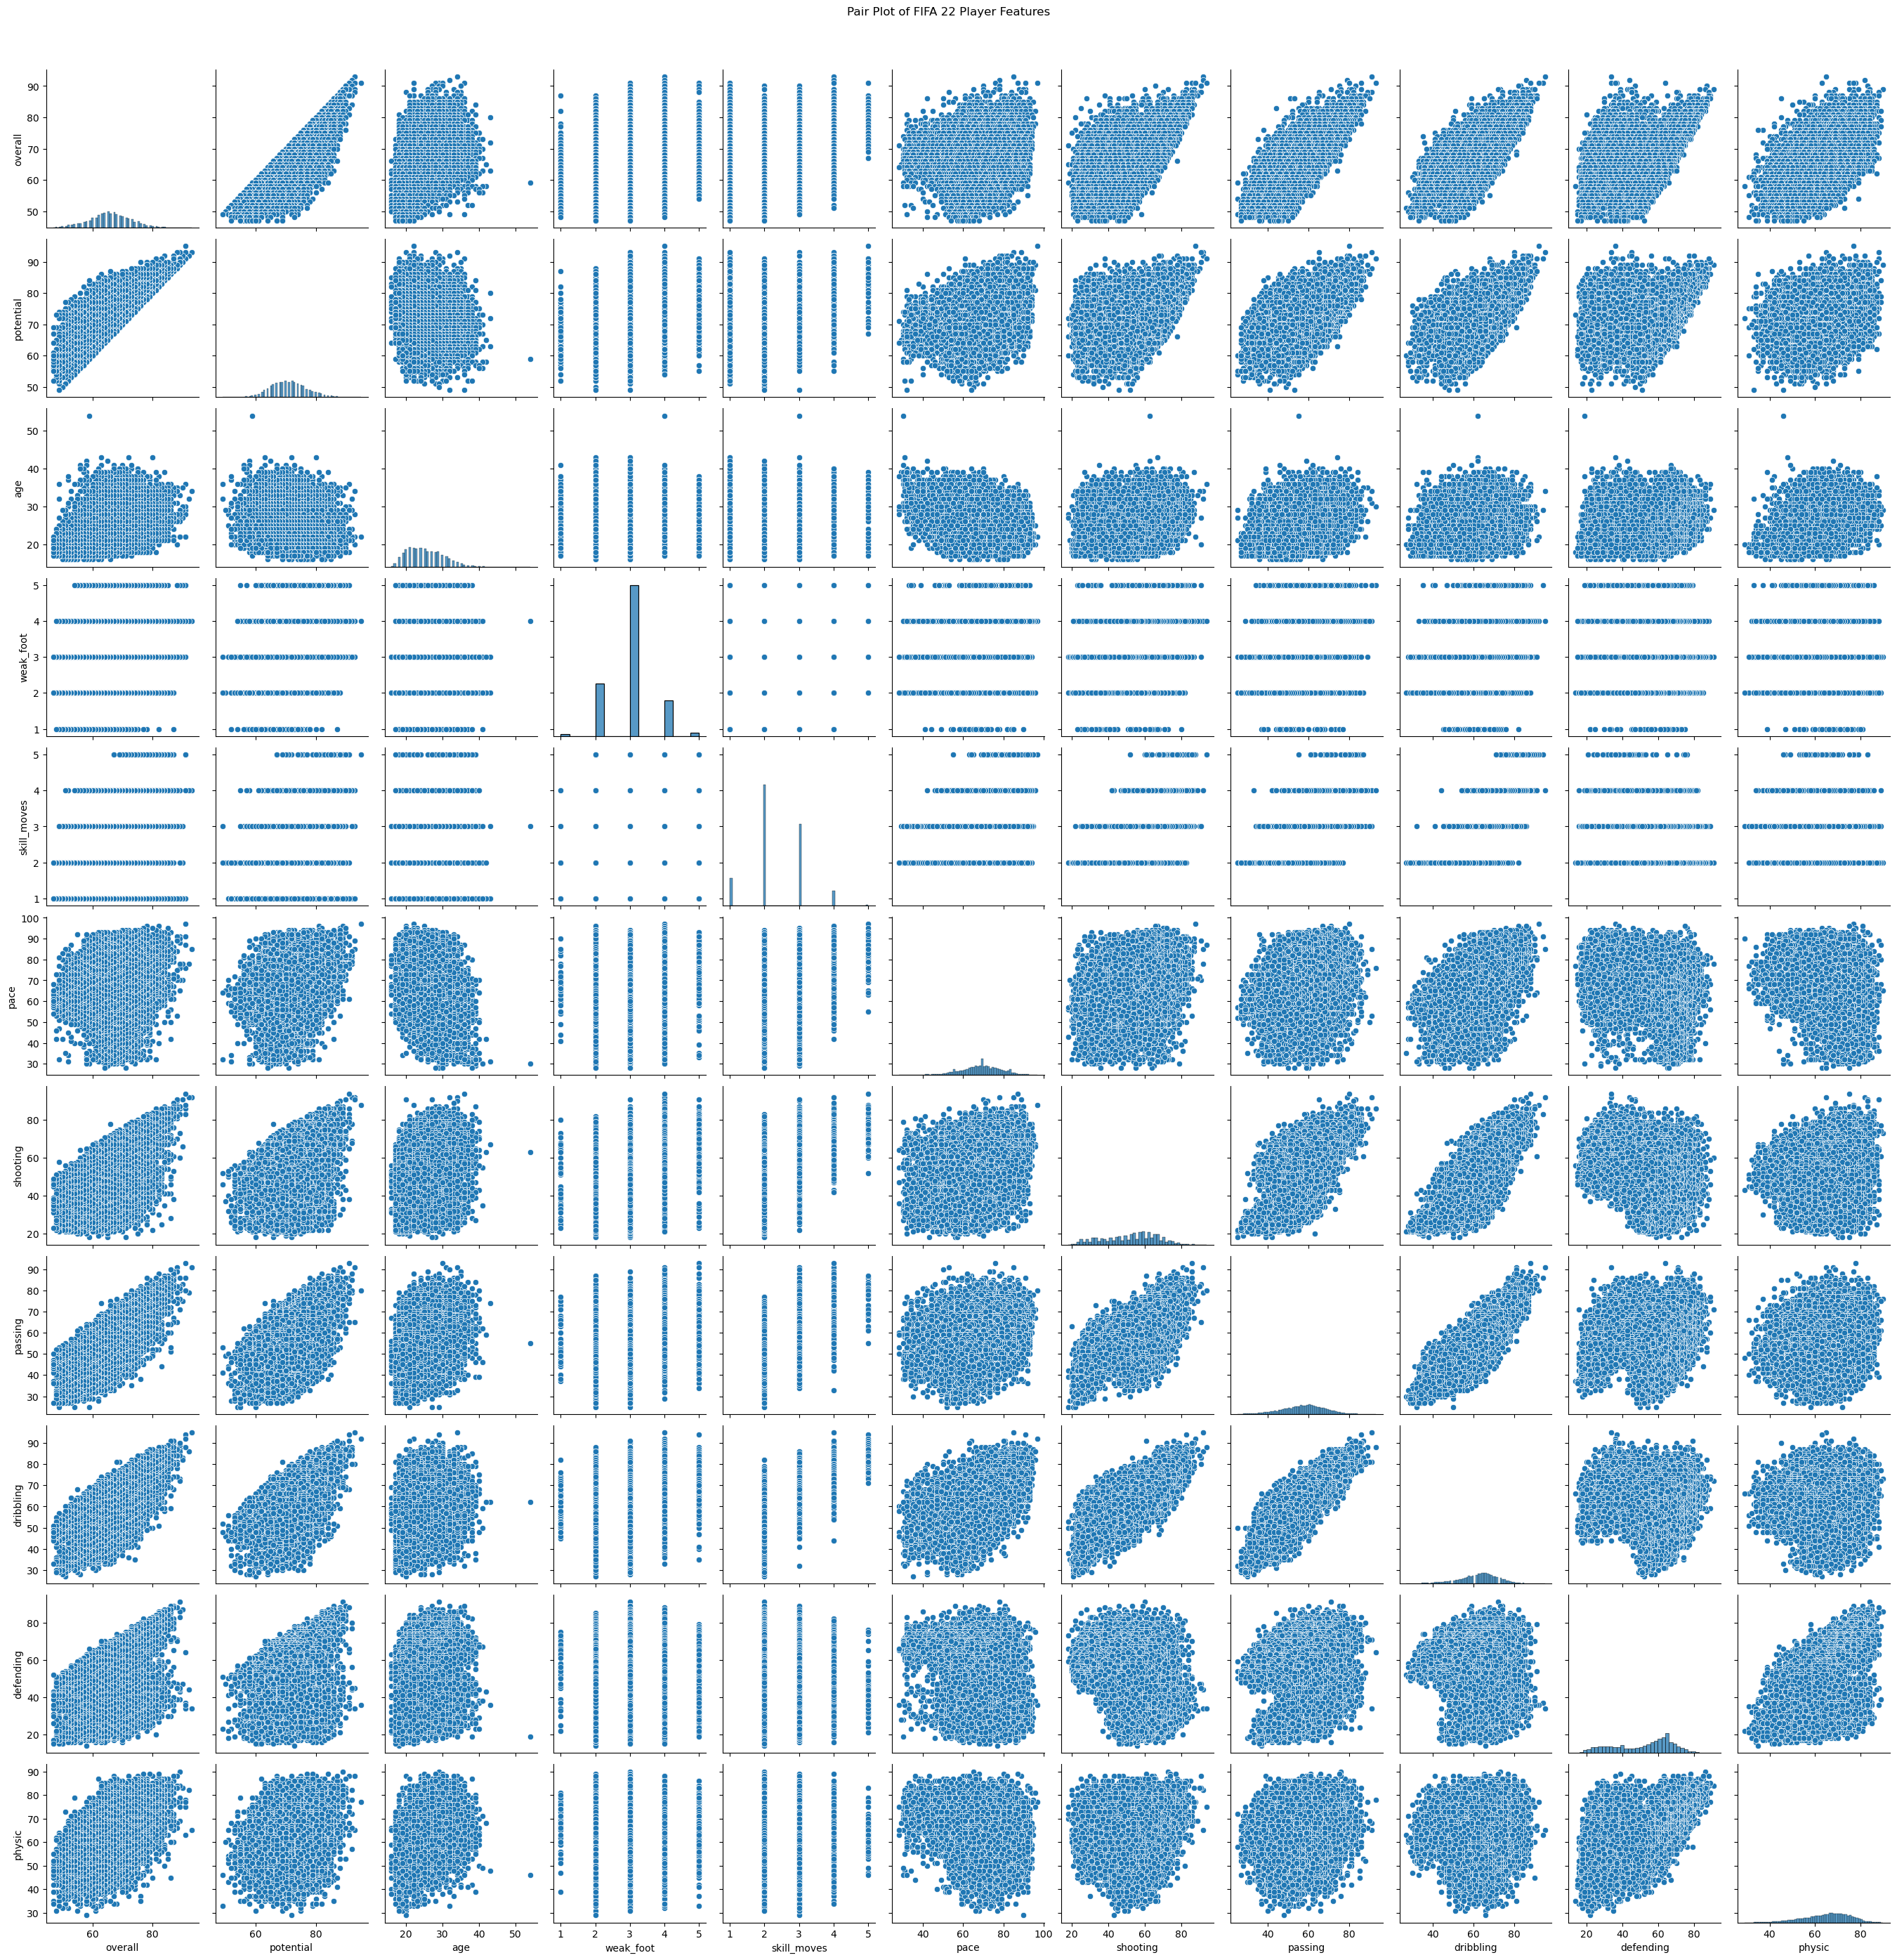

In [35]:
features = ['overall', 'potential', 'age', 'weak_foot', 'skill_moves', 
            'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Creating pair plot
sns.pairplot(df[features])
plt.suptitle('Pair Plot of FIFA 22 Player Features', y=1.02)
plt.show()

In [29]:
#exploring the distribution of numerical data.
def plt_df(data, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=data, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])

    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Box Plot")

    plt.show()

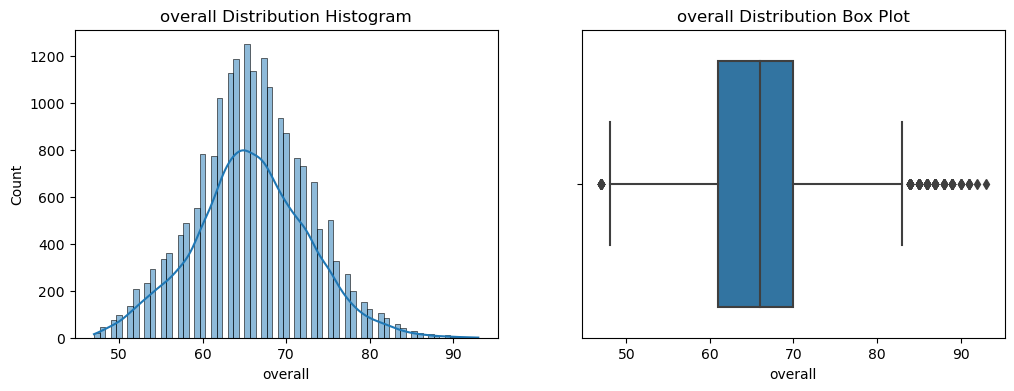

In [30]:
plt_df(df_new,'overall')

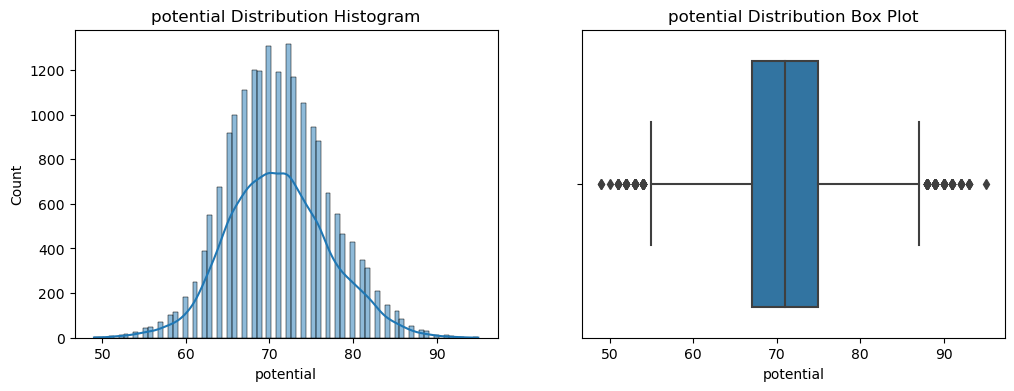

In [31]:
plt_df(df_new,'potential')

In [32]:
#Add new column and save the updated dataframe
import os
df_new['Players Skill Set (In Total)'] = 0
df_new.to_csv("Fifa22updates.csv", index=False)
current_directory = os.getcwd()

In [33]:
#datafram saved in the location
print("The CSV file is saved in the following location:")
print(current_directory + "\\Fifa22updates.csv")  # On Windows


The CSV file is saved in the following location:
C:\Users\pc\Fifa22updates.csv


In [34]:
#calculating a new attribute called "Players Skill Set (In Total)" based on the average of several player attributes such as pace, shooting, passing, dribbling, and defending. 
df_new['Players Skill Set (In Total)'] = (df_new["pace"] + df_new["shooting"] + 
                                                  df_new["passing"] + df_new["dribbling"] + 
                                                  df_new["defending"]) / 5

df_new['Players Skill Set (In Total)'] = df_new['Players Skill Set (In Total)'].round()

# Save the updated dataset to a CSV file named "Fifa22updates.csv"
df_new.to_csv("Fifa22updates.csv", index=False)

# Apply a mapping to convert skill set scores into 0's and 1's based on the condition
df_new['Players Skill Set (In Total)'] = df_new['Players Skill Set (In Total)'].map(lambda x: 1 if x >= 60.0 else 0)
df_new

short_name  overall  potential  age  weak_foot  skill_moves  \
0                L. Messi       93         93   34          4            4   
1          R. Lewandowski       92         92   32          4            4   
2       Cristiano Ronaldo       91         91   36          4            5   
3               Neymar Jr       91         91   29          5            5   
4            K. De Bruyne       91         91   30          5            4   
...                   ...      ...        ...  ...        ...          ...   
19234           Song Defu       47         52   22          3            2   
19235           C. Porter       47         59   19          3            2   
19236            N. Logue       47         55   21          3            2   
19237           L. Rudden       47         60   19          3            2   
19238  E. Lalchhanchhuaha       47         60   19          3            2   

       pace  shooting  passing  dribbling  defending  physic  \
0      85.0      92.0     91.0       95.0       34.0    65.0   
1      78.0      92.0     79.0       86.0       44.0    82.0   
2      87.0      94.0     80.0       88.0       34.0    75.0   
3      91.0      83.0     86.0       94.0       37.0    63.0   
4      76.0      86.0     93.0       88.0       64.0    78.0   
...     ...       ...      ...        ...        ...     ...   
19234  58.0      35.0     46.0       48.0       42.0    49.0   
19235  59.0      39.0     50.0       46.0       41.0    51.0   
19236  60.0      37.0     45.0       49.0       41.0    52.0   
19237  68.0      46.0     36.0       48.0       15.0    42.0   
19238  68.0      38.0     45.0       48.0       36.0    48.0   

       Players Skill Set (In Total)  
0                                 1  
1                                 1  
2                                 1  
3                                 1  
4                                 1  
...                             ...  
19234                             0  
19235                             0  
19236                             0  
19237                             0  
19238                             0  

[19239 rows x 13 columns]

In [35]:
#import classification technique
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score





#### Classification Models

In [36]:
#class distribution
X = df_new[['overall','potential','weak_foot','skill_moves']]
Y = df_new.iloc[:,-1]

# Check the class distribution before oversampling
print("Class distribution before oversampling:")
print(Y.value_counts())

from imblearn.over_sampling import RandomOverSampler
# Define the oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Resample the data
X_resampled, y_resampled = oversampler.fit_resample(X, Y)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Convert the resampled data back to a Pandas DataFrame
data_resampled = pd.DataFrame(np.concatenate([X_resampled, y_resampled.values.reshape(-1,1)], axis=1))

# Save the resampled data to a new file
data_resampled.to_csv(".csv", index=False)

Class distribution before oversampling:
Players Skill Set (In Total)
0    11487
1     7752
Name: count, dtype: int64


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\pc\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

#### KNN Classification

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=0)
accuracy_scores = []

#K neighbors classification 
kNN = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
kNN.fit(X_train, Y_train)

Y_pred_knn = kNN.predict(X_test)

# Get the accuracy score
accuracy = 100*accuracy_score(Y_test, Y_pred_knn)
print("Accuracy: {:.2f}%".format(accuracy))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred_knn)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_knn))

Accuracy: 81.45%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      4083
           1       0.77      0.76      0.76      2651

    accuracy                           0.81      6734
   macro avg       0.81      0.80      0.81      6734
weighted avg       0.81      0.81      0.81      6734



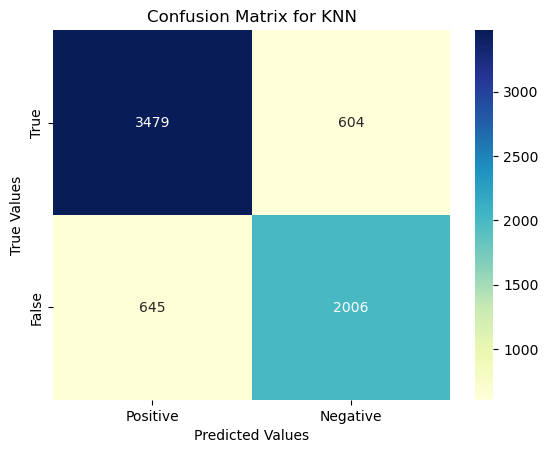

In [38]:
# Assuming Y_test and Y_pred_knn are defined correctly
# Calculate the confusion matrix
confusion = confusion_matrix(Y_test, Y_pred_knn)

# Convert the confusion matrix into a DataFrame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for KNN")
plt.show()

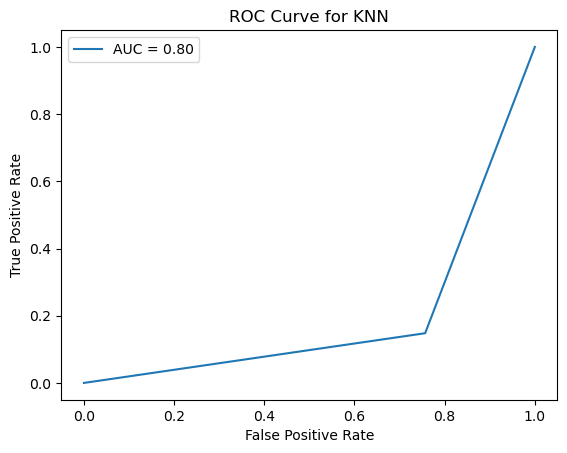

In [39]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred_knn)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred_knn)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN")
plt.legend()
plt.show()

In [40]:
kNN.fit(X_train, Y_train)

# Calculate permutation importance
perm = permutation_importance(kNN, X_test, Y_test, random_state=1)

# Get the feature importances
importances = perm.importances_mean
std_devs = perm.importances_std

# Get the feature names
feature_names = X_test.columns.tolist()

# Print the header
print("Weight\tFeature")

# Iterate over the importances, standard deviations, and feature names
for importance, std_dev, feature in zip(importances, std_devs, feature_names):
    # Format the importance and standard deviation with ± symbol
    importance_str = "{:.4f} ± {:.4f}".format(importance, std_dev)
    # Print the formatted importance and feature
    print("{}\t{}".format(importance_str, feature))

Weight	Feature
0.1707 ± 0.0034	overall
0.0113 ± 0.0036	potential
0.0003 ± 0.0013	weak_foot
0.1056 ± 0.0029	skill_moves


#### Random Forest Classification


In [42]:
clf = RandomForestClassifier(n_estimators=10, random_state=45)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred_dt)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_dt))

Accuracy: 82.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      4083
           1       0.78      0.76      0.77      2651

    accuracy                           0.82      6734
   macro avg       0.82      0.81      0.81      6734
weighted avg       0.82      0.82      0.82      6734



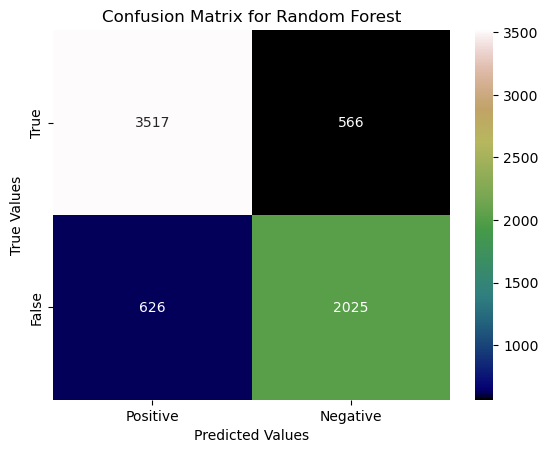

In [43]:
confusion = confusion_matrix(Y_test, Y_pred_dt)

# Convert the confusion matrix into a data frame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix as a bar plot
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="gist_earth")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Random Forest")
plt.show()

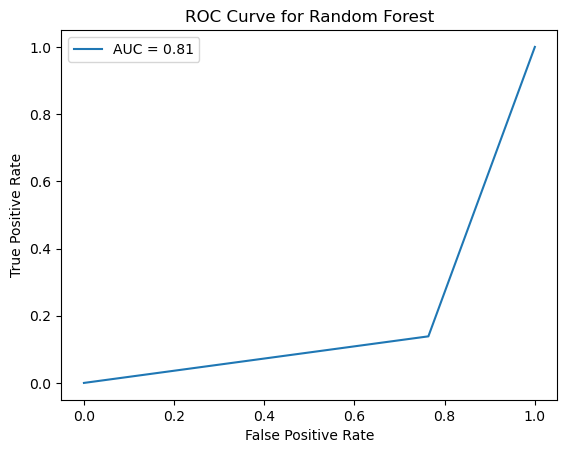

In [44]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred_dt)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred_dt)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend()
plt.show()


In [45]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Calculate permutation importance
perm = permutation_importance(rf, X_test, Y_test, random_state=1)

# Get the feature importances
importances = perm.importances_mean
std_devs = perm.importances_std

# Get the feature names
feature_names = X_test.columns.tolist()

# Print the header
print("Weight\tFeature")

# Iterate over the importances, standard deviations, and feature names
for importance, std_dev, feature in zip(importances, std_devs, feature_names):
    # Format the importance and standard deviation with ± symbol
    importance_str = "{:.4f} ± {:.4f}".format(importance, std_dev)
    # Print the formatted importance and feature
    print("{}\t{}".format(importance_str, feature))

Weight	Feature
0.1604 ± 0.0036	overall
0.0053 ± 0.0014	potential
0.0009 ± 0.0015	weak_foot
0.1256 ± 0.0045	skill_moves


#### SVM Classification

In [46]:
SVM_train = SVC(kernel='rbf', C=1, gamma=0.1, random_state=45)
SVM_train.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm = SVM_train.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Get the classification report
cls_rpt = classification_report(Y_test, Y_pred_svm)
print("\nClassification Report:\n", cls_rpt)

accuracy_scores.append(accuracy_score(Y_test, Y_pred_svm))

Accuracy: 83.77%

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4083
           1       0.82      0.75      0.78      2651

    accuracy                           0.84      6734
   macro avg       0.83      0.82      0.83      6734
weighted avg       0.84      0.84      0.84      6734



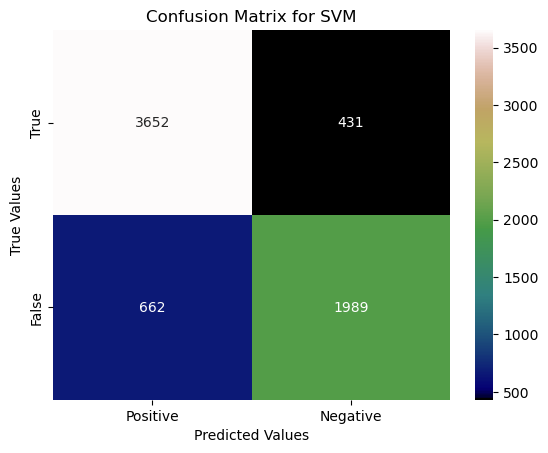

In [47]:
confusion = confusion_matrix(Y_test, Y_pred_svm)

# Convert the confusion matrix into a data frame
confusion_df = pd.DataFrame(confusion, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix as a bar plot
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="gist_earth")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for SVM")
plt.show()

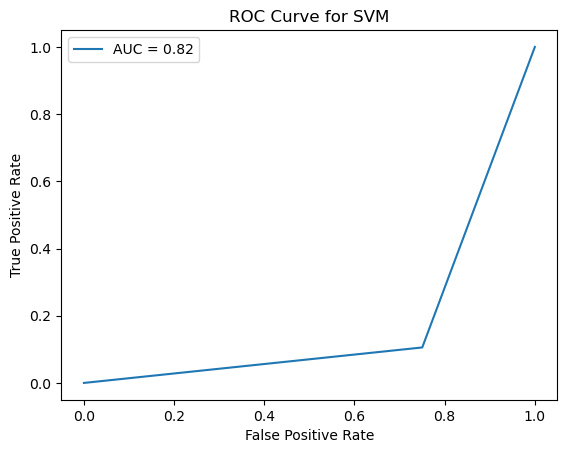

In [48]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred_svm)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred_svm)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend()
plt.show()

In [49]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train)

# Calculate permutation importance
perm = permutation_importance(svm, X_test, Y_test, random_state=1)

# Get the feature importances
importances = perm.importances_mean
std_devs = perm.importances_std

# Get the feature names
feature_names = X_test.columns.tolist()

# Print the header
print("Weight\tFeature")

# Iterate over the importances, standard deviations, and feature names
for importance, std_dev, feature in zip(importances, std_devs, feature_names):
    # Format the importance and standard deviation with ± symbol
    importance_str = "{:.4f} ± {:.4f}".format(importance, std_dev)
    # Print the formatted importance and feature
    print("{}\t{}".format(importance_str, feature))

Weight	Feature
0.1572 ± 0.0037	overall
0.0005 ± 0.0010	potential
-0.0013 ± 0.0006	weak_foot
0.1503 ± 0.0032	skill_moves


#### Decision Tree Classfication

In [50]:
dt_classifier = DecisionTreeClassifier(random_state=45)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_DT = dt_classifier.predict(X_test)

# Calculate the accuracy score
accuracy_dt = accuracy_score(Y_test, Y_pred_DT)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))

# Get the classification report
cls_rpt_dt = classification_report(Y_test, Y_pred_DT)
print("\nDecision Tree Classification Report:\n", cls_rpt_dt)

# Append the accuracy score to a list if needed
accuracy_scores.append(accuracy_dt)

Decision Tree Accuracy: 82.33%

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      4083
           1       0.80      0.74      0.77      2651

    accuracy                           0.82      6734
   macro avg       0.82      0.81      0.81      6734
weighted avg       0.82      0.82      0.82      6734



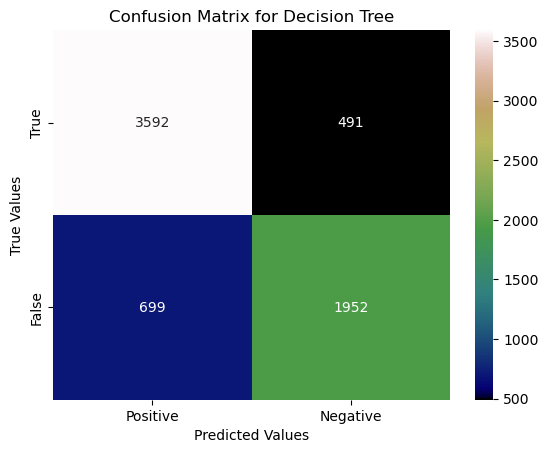

In [51]:
confusion_dt = confusion_matrix(Y_test, Y_pred_DT)

# Convert the confusion matrix into a data frame
confusion_df_dt = pd.DataFrame(confusion_dt, index=["True", "False"], columns=["Positive", "Negative"])

# Plot the confusion matrix for Decision Tree as a bar plot
sns.heatmap(confusion_df_dt, annot=True, fmt="d", cmap="gist_earth")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

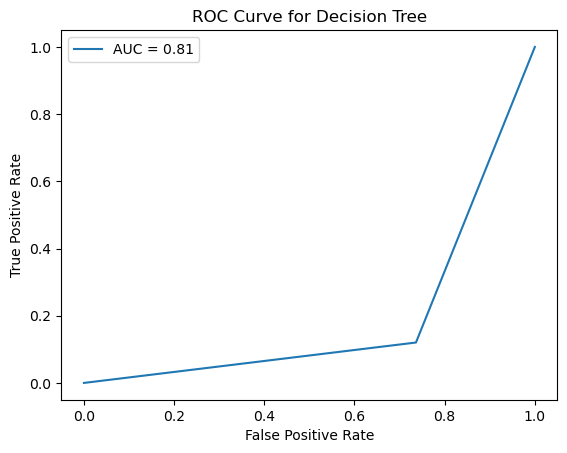

In [52]:
y_true = [0 if y == 1.0 else 1 for y in Y_test]

# Get the ROC AUC score
auc = roc_auc_score(Y_test, Y_pred_DT)

# Get the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_true, Y_pred_DT)

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend()
plt.show()

In [53]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Calculate permutation importance
perm = permutation_importance(dt, X_test, Y_test, random_state=1)

# Get the feature importances
importances = perm.importances_mean
std_devs = perm.importances_std

# Get the feature names
feature_names = X_test.columns.tolist()

# Print the header
print("Weight\tFeature")

# Iterate over the importances, standard deviations, and feature names
for importance, std_dev, feature in zip(importances, std_devs, feature_names):
    # Format the importance and standard deviation with ± symbol
    importance_str = "{:.4f} ± {:.4f}".format(importance, std_dev)
    # Print the formatted importance and feature
    print("{}\t{}".format(importance_str, feature))

Weight	Feature
0.1833 ± 0.0021	overall
0.0084 ± 0.0011	potential
0.0052 ± 0.0011	weak_foot
0.1284 ± 0.0047	skill_moves


In [54]:
low_weak_foot_threshold = 2

# Update weak_foot for players with a low weak foot value
df_new.loc[df_new['weak_foot'] < low_weak_foot_threshold, 'weak_foot'] = 4

In [55]:
X = df_new[['overall', 'potential', 'weak_foot', 'skill_moves']]
Y = df_new['Players Skill Set (In Total)']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=0)

In [56]:
accuracy_scores_updated=[]

#K neighbors classification 
kNN = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
kNN.fit(X_train, Y_train)

Y_pred_knn1 = kNN.predict(X_test)

# Calculate permutation importance
perm = permutation_importance(rf, X_test, Y_test, random_state=1)

# Get the importances
importances = perm.importances_mean


# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_knn1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_knn1))

Accuracy after weak foot improvement: 82.00%


In [57]:
clf = RandomForestClassifier(n_estimators=10, random_state=45)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_dt1 = clf.predict(X_test)

# Calculate permutation importance
perm = permutation_importance(rf, X_test, Y_test, random_state=1)

# Get the importances
importances = perm.importances_mean

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_dt1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_dt1))

Accuracy after weak foot improvement: 82.31%


In [58]:
SVM_train = SVC(kernel='rbf', C=1, gamma=0.1, random_state=45)
SVM_train.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_svm1 = SVM_train.predict(X_test)

# Calculate permutation importance
perm = permutation_importance(rf, X_test, Y_test, random_state=1)

# Get the importances
importances = perm.importances_mean

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_svm1)
print("Accuracy after weak foot improvement: {:.2f}%".format(accuracy_after_improvement * 100))

accuracy_scores_updated.append(accuracy_score(Y_test, Y_pred_svm1))

Accuracy after weak foot improvement: 83.77%


In [66]:
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(X_train, Y_train)

# Predict using the trained model
Y_pred_dt = dt.predict(X_test)

# Calculate permutation importance
perm = permutation_importance(rf, X_test, Y_test, random_state=1)

# Get the importances
importances = perm.importances_mean

# Step 4: Provide targeted training (This step is not implemented in code as it requires external game functionality)

# Step 5: Evaluate the improvement
# Calculate the accuracy score after the improvement
accuracy_after_improvement = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy after improvement: {:.2f}%".format(accuracy_after_improvement * 100))

# Append the accuracy score to the list
accuracy_scores_updated.append(accuracy_after_improvement)

Accuracy after improvement: 82.37%


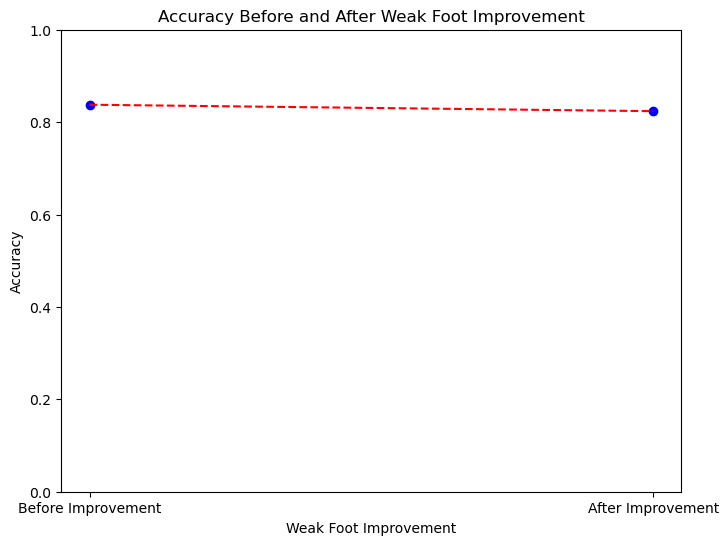

In [67]:
Y_pred = SVM_train.predict(X_test)

# Plot the scatter plot
x_values = np.array([0, 1])
y_values = np.array([accuracy, accuracy_after_improvement])

plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue')
plt.plot(x_values, y_values, color='red', linestyle='dashed')
plt.xticks(x_values, ['Before Improvement', 'After Improvement'])
plt.xlabel('Weak Foot Improvement')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Weak Foot Improvement')
plt.ylim(0, 1)
plt.show()

In [68]:
print("Length of accuracy_scores:", len(accuracy_scores))
print("Length of accuracy_scores_updated:", len(accuracy_scores_updated))

Length of accuracy_scores: 5
Length of accuracy_scores_updated: 5


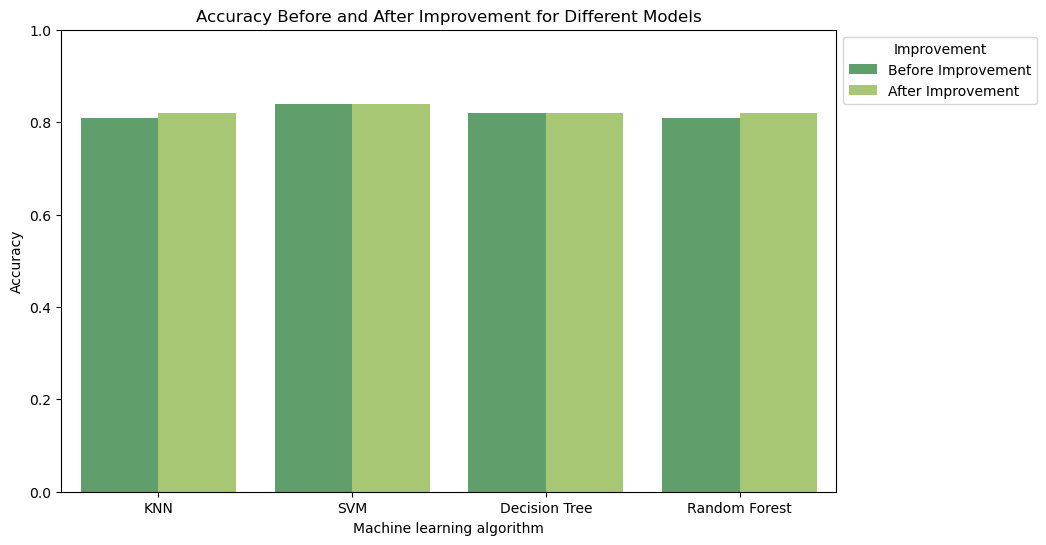

In [70]:
accuracy_scores = [0.81 , 0.84 ,0.82 , 0.81]
accuracy_scores_updated = [0.82,0.84,0.82,0.82]
# Create DataFrame for accuracy scores
accuracy_of_all_models = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Before Improvement': accuracy_scores,
    'After Improvement': accuracy_scores_updated
})

# Melt the DataFrame to make it suitable for visualization
accuracy_data_melted = pd.melt(accuracy_of_all_models, id_vars=['Model'], var_name='Improvement', value_name='Accuracy')

# Plot the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_data_melted, x='Model', y='Accuracy', hue='Improvement', palette='summer')
plt.ylim(0, 1)
plt.xlabel('Machine learning algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Improvement for Different Models')
plt.legend(title='Improvement', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### SVM is considered to best machine learning algorith for player perfromance predictiom with acurracy value = 0.84 before improvement and after improvement.
